In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import re
import string

In [2]:
pd.set_option('display.max_rows', None)

# Habiendo probado que funciona, lo paso en limpio

### B)

In [3]:
def creador_matriz_markov(matriz_inicial):
    matriz_inicial.columns=['Dia','Valor_actual']
    
    matriz_rotada = matriz_inicial.copy()
    matriz_rotada.columns=['Dia','Valor_siguiente']
    matriz_rotada = matriz_rotada.shift(periods=-1)
    
    matriz_mergeada = matriz_inicial.merge(matriz_rotada, left_index=True, right_index=True)
    
    #en caso de caer en el valor del ultimo dia de la matriz original, ésta podria indicarme que el siguiente valor 
    #no aparece en ningun otro caso, por lo que no estaría en la matriz, asique la agrego uniendola con el primer elemento
    new_row = {'Dia_x':0, 'Valor_actual': matriz_mergeada.iloc[-1][1], 'Dia_y':1, 'Valor_siguiente': matriz_mergeada.iloc[0][1]}
    matriz_mergeada = matriz_mergeada.append(new_row, ignore_index=True)
    
    valor_actual_siguiente = matriz_mergeada.groupby(['Valor_actual','Valor_siguiente']).Dia_y.count().rename('cantidad_ocurrencias').to_frame()
    valor_actual_siguiente = valor_actual_siguiente.reset_index()
    
    matriz_markoviana = valor_actual_siguiente.pivot_table(index = 'Valor_actual', columns='Valor_siguiente', values='cantidad_ocurrencias', aggfunc=np.sum)
    
    matriz_markoviana['suma_de_valores'] = matriz_markoviana.sum(axis=1)
    
    matriz_markoviana = matriz_markoviana.iloc[:,:-1].div(matriz_markoviana.suma_de_valores, axis=0)
    
    #podria sacarle los reemplazar los nan por 0 pero mas adelante me conviene dejarlos asi para sacarlos mas facil
    #matriz_markoviana = matriz_markoviana.fillna(0)
    
    return(matriz_markoviana)
    
    

In [13]:
acciones_A = pd.read_csv("accion A.csv",encoding = "ISO-8859-1")
matriz_markoviana_A = creador_matriz_markov(acciones_A)
matriz_markoviana_A.fillna(0).head()

Valor_siguiente,23.45,23.50,24.00,24.35,24.40,25.70,26.00,26.50,26.80,26.90,...,64.70,65.50,66.25,67.50,69.00,69.45,69.70,70.00,71.00,71.15
Valor_actual,,,,,,,,,,,,,,,,,,,,,
23.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
acciones_B = pd.read_csv("accion B.csv",encoding = "ISO-8859-1")
matriz_markoviana_B = creador_matriz_markov(acciones_B)
matriz_markoviana_B.fillna(0).head()

Valor_siguiente,7.18,7.67,7.73,7.78,7.86,7.92,8.02,8.07,8.15,8.24,...,25.49,25.54,25.61,25.62,25.70,25.74,25.90,26.34,26.48,26.60
Valor_actual,,,,,,,,,,,,,,,,,,,,,
7.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### C)

In [16]:
acciones_A.Valor_actual.value_counts()/len(acciones_A)

41.00    0.022093
30.50    0.015116
42.00    0.013953
44.00    0.013953
35.00    0.012791
42.50    0.012791
40.00    0.012791
38.00    0.012791
39.50    0.011628
39.00    0.011628
38.50    0.011628
41.50    0.011628
43.00    0.010465
37.50    0.010465
36.00    0.010465
37.00    0.009302
42.40    0.009302
34.50    0.009302
48.00    0.008140
42.90    0.008140
50.00    0.008140
30.00    0.008140
36.50    0.008140
41.95    0.008140
33.50    0.008140
33.00    0.008140
41.80    0.006977
34.00    0.006977
41.40    0.006977
34.90    0.006977
32.00    0.006977
39.95    0.006977
51.00    0.006977
43.10    0.006977
40.50    0.006977
47.50    0.005814
42.20    0.005814
51.50    0.005814
52.00    0.005814
39.80    0.005814
44.50    0.005814
32.50    0.004651
57.00    0.004651
42.30    0.004651
53.00    0.004651
41.05    0.004651
57.80    0.004651
36.80    0.004651
42.80    0.004651
37.95    0.004651
38.30    0.004651
43.50    0.004651
36.30    0.004651
36.20    0.004651
31.00    0.004651
42.10    0

In [7]:
acciones_B.Valor_actual.value_counts()/len(acciones_B)

18.42    0.005821
20.16    0.005821
21.55    0.004657
18.94    0.004657
20.75    0.004657
19.79    0.004657
17.49    0.004657
20.91    0.004657
18.74    0.003492
19.09    0.003492
12.13    0.003492
18.69    0.003492
19.37    0.003492
9.89     0.003492
18.53    0.003492
18.88    0.003492
18.62    0.003492
20.59    0.003492
21.30    0.003492
20.14    0.003492
10.67    0.003492
20.45    0.003492
20.27    0.003492
19.03    0.003492
20.21    0.003492
19.20    0.003492
17.43    0.003492
17.17    0.003492
20.39    0.003492
18.17    0.003492
18.32    0.003492
18.40    0.003492
8.63     0.003492
19.85    0.003492
20.70    0.003492
20.69    0.003492
19.31    0.003492
19.47    0.003492
21.05    0.003492
17.60    0.003492
19.00    0.003492
20.50    0.003492
18.91    0.003492
23.25    0.003492
9.23     0.003492
8.73     0.002328
9.62     0.002328
15.51    0.002328
19.90    0.002328
19.21    0.002328
17.16    0.002328
22.70    0.002328
15.67    0.002328
22.61    0.002328
18.02    0.002328
20.82    0

In [8]:
acciones_B

,Dia,Valor_actual
0,2,21.88
1,3,19.85
2,4,18.89
3,5,20.82
4,6,19.73
5,7,20.14
6,8,19.23
7,9,17.85
8,10,19.44
9,11,22.68


### D)

In [9]:
#d_ evaluacion de un año
def simulacion_de_evolucion_en_un_anio(matriz_markoviana):

    valores = []
    valor_actual = matriz_markoviana.iloc[1].index[0]  #elijo el primer valor
    for i in range(365):  #cambiar a 365
        random_value = np.random.rand()
    
        valores.append(valor_actual)
    
        probabilidad_acumulada = 0
        nuevo_valor = False
        i=0
        #print('')
        #print('')
        #print('estoy en la posicion:',valor_actual)
        #print('mi valor random es:',random_value)
        #print(matriz_markoviana.loc[valor_actual].dropna())
        while(nuevo_valor==False):
            probabilidad_acumulada = probabilidad_acumulada + matriz_markoviana.loc[valor_actual].dropna()[i]
            #print('la prob actual vale: ',matriz_markoviana.loc[valor_actual].dropna()[i],' y estoy en la posicion: ',matriz_markoviana.loc[valor_actual].dropna().index[i],'la_prob_acum_vale',probabilidad_acumulada)
            if(random_value<= probabilidad_acumulada):
                #print('entro a:',matriz_markoviana.loc[valor_actual].dropna().index[i])
                valor_actual = matriz_markoviana.loc[valor_actual].dropna().index[i]
                nuevo_valor = True
            i = i+1
    return(valores)

In [10]:
valores_a = simulacion_de_evolucion_en_un_anio(matriz_markoviana_A)

In [11]:
valores_b = simulacion_de_evolucion_en_un_anio(matriz_markoviana_B)

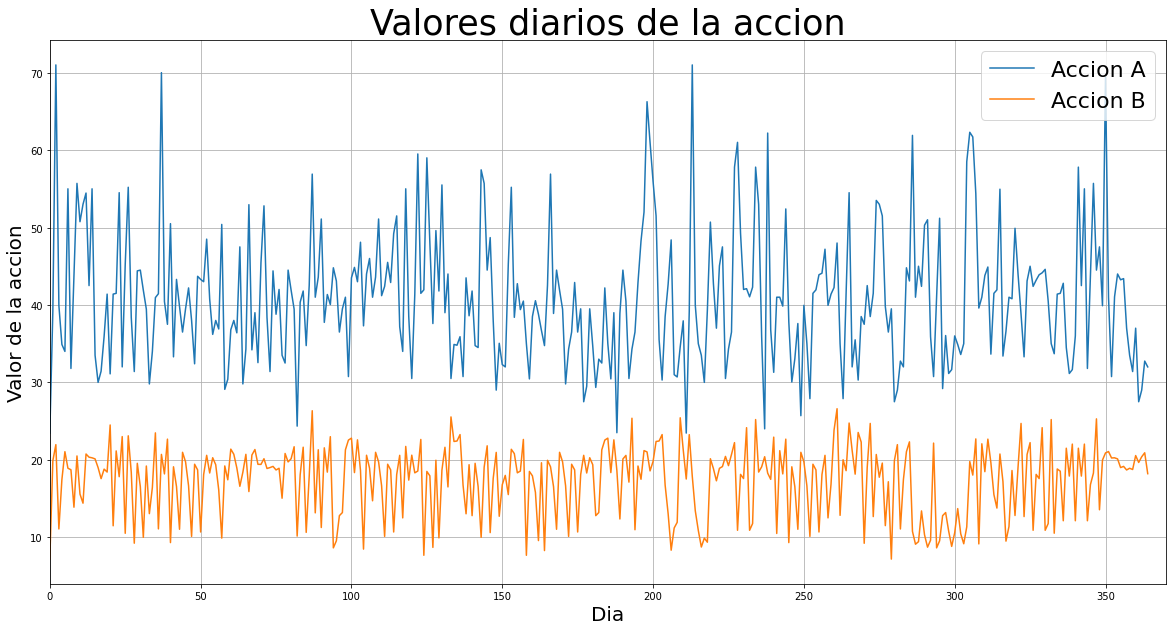

<Figure size 432x288 with 0 Axes>

In [12]:
plot.figure(figsize=(20, 10))
plot.plot(range(len(valores_a)),valores_a,valores_b)
plot.title('Valores diarios de la accion',size=35)
plot.ylabel('Valor de la accion',size=20)
plot.xlabel('Dia',size=20)
plot.grid(True)
plot.xlim(0,370)
labels = ['Accion A','Accion B']
plot.rcParams.update({'font.size': 22})
plot.legend(labels, loc=1)
plot.show()
plot.clf()